# API exercises

A fast ride through many of the APIs we introduced! Answer below questions to get to know the basics of each API using the [code snippets](https://github.com/JanaLasser/SICSS-aachen-graz/blob/main/02_01_APIs/exercise/API_access_code_snippets.ipynb) we provide for each API. If you get stuck on one task, move on after trying for max 10 min.  

**Note:** You don't have to work on the tasks in sequential order, as they do not depend on each other. Start with the API you are interested in using the most.

* **Google trends**: When was the maximum for searches for "machine learning" in your country of residence in the last 5 years?
* **Twitter API**: 
    * How many tweets did the account of the president of the United States post in the last 7 days? If you have academic level API access, check the number of tweets for all of 2022. Note: you can solve this exercise both with the "search" and the "counts" endpoint! 
    * When using the full-archive search, how many tweets are returned for a single request?
    * Given Twitter's rate limits for the full-archive search: how long will it take to download a number of tweets equal to your monthly quota (10 mio tweets)?
* **Reddit Pushshift**: Which submission in the subreddit [compsocialsci](https://www.reddit.com/r/compsocialsci/) from **2021** to now had the most comments?
* **Telegram** 
    * Download all messages from the t.me/quote channel. 
    * How many messages are there? 
    * When was the earliest message posted? 
    * What were the quotes of the day on your last birthday?
* **New York Times**: what is the rate limit for requests to the New York Times API?
* **Wikipedia**: How many links are contained in the [deep learning page](https://en.wikipedia.org/wiki/Deep_learning)?
* **Steam reviews**: retrieve all positive and negative reviews of the game [Elden Ring](https://store.steampowered.com/agecheck/app/1245620/) in German. 
    * How many games do reviewers who leave positive reviews own on average? How many for the negative reviewers?
    * How many total hours played to people who leave positive reviews have? And how many the people who leave negative reviews?
* **Open Street Maps**: how many dumpsters does Berlin have?
* **CrossRef**: Get all publications associated with the search term "Reddit". How many are there? Which is the hightest cited one?
* **Spotify**: Which national anthem has the higher "danceability", the German or the Austrian one?
* **Pandas datareader**: Download data of the gross domestic product of Austria and Germany for the last 10 years. How do the two countries compare? Hint: use the World Bank data base for the task.

# 0. Common Libraries

In [1]:
# general imports
from datetime import date, datetime, timezone
import asyncio
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Google Trends

In [3]:
# import python wrapper
from pytrends.request import TrendReq

In [4]:
trend_client = TrendReq()

In [14]:
kw_list = ["Machine Learning", "machinelearning"] # list of keywords we want to get search trends for
timeframe = "today 5-y"  # timeframe for which we want to request the trend
geo = "DE" # geographical scope for wich we want to request the trend

trend_client.build_payload(
    kw_list, 
    timeframe=timeframe,
    geo = 'DE'
)

In [15]:
df = trend_client.interest_over_time()
df.head(2)

,Machine Learning,machinelearning,isPartial
date,,,
2017-07-23,52,0,False
2017-07-30,52,1,False


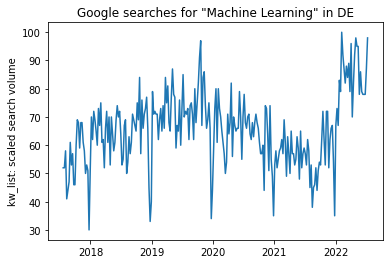

In [19]:
# visualize the result
fig, ax = plt.subplots()
kw = kw_list[0]
ax.plot(df.index, df[kw])
ax.set_ylabel("Scaled search volume")
ax.set_title(f'Google searches for "{kw}" in {geo}');

# 2. Twitter API

In [31]:
from twarc import Twarc2
bearer_token = "AAAAAAAAAAAAAAAAAAAAADM%2FegEAAAAA7nf0wAQhPrwk5no22dSLCagIztY%3Dnweg5YjswUpOIbG8j0xxtMZVlKJCWEB491knYQO15aExqQ6Iw7" # replace the XXX with your bearer token
twarc_client = Twarc2(bearer_token=bearer_token)

In [32]:
# empty list to store the search results
tweets = [] 

# tweets we look for should contain the following search string
query = 'from:joebiden'

# start and end time of the query
start = datetime(2022, 7, 1, 0, 0, 0, 0, tzinfo = timezone.utc)
end = datetime(2022, 7, 7, 0, 0, 0, 0, tzinfo   = timezone.utc)

# Note: if you only have "essential" or "elevated" API access, you have to use
# the function search_recent() and can only access tweets from the last 7 days.
# If you have "academic" access, you can use the search_all() function as in the
# example to access historic tweets back to march 2010 when Twitter was founded.
for tweet in twarc_client.search_all(
        query,
        start_time=start,
        end_time=end):
    tweets.append(tweet)

Unexpected HTTP response: <Response [403]>


HTTPError: 403 Client Error: Forbidden for url: https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&media.fields=alt_text%2Cduration_ms%2Cheight%2Cmedia_key%2Cpreview_image_url%2Ctype%2Curl%2Cwidth%2Cpublic_metrics&poll.fields=duration_minutes%2Cend_datetime%2Cid%2Coptions%2Cvoting_status&place.fields=contained_within%2Ccountry%2Ccountry_code%2Cfull_name%2Cgeo%2Cid%2Cname%2Cplace_type&start_time=2022-07-01T00%3A00%3A00%2B00%3A00&end_time=2022-07-07T00%3A00%3A00%2B00%3A00&query=from%3Ajoebiden&max_results=100

In [27]:
#tweets